In [1]:
#importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from datetime import datetime
from datetime import date
#other libs

In [2]:
#loading files
train = pd.read_csv(r"C:\Users\Gautam's\Downloads\Assignment 4 (3)\train.csv")
test = pd.read_csv (r"C:\Users\Gautam's\Downloads\Assignment 4 (3)\test.csv")

In [3]:
#getting dimensions
train.shape, test.shape

((12980, 12), (4399, 11))

In [4]:
#train's top 5 rows
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 0:00:00,1,0,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2011-01-01 1:00:00,1,0,0,1,9.02,13.635,80.0,0.0,8,32,40
2,2011-01-01 2:00:00,1,0,0,1,9.02,13.635,80.0,0.0,5,27,32
3,2011-01-01 3:00:00,1,0,0,1,9.84,14.395,75.0,0.0,3,10,13
4,2011-01-01 4:00:00,1,0,0,1,9.84,14.395,75.0,0.0,0,1,1


In [5]:
#test's top 5 rows
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered
0,2012-06-30 1:00:00,3,0,0,3,26.24,28.790,89.0,15.0013,3,55
1,2012-06-30 2:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,7,54
2,2012-06-30 3:00:00,3,0,0,2,26.24,28.790,89.0,0.0000,3,20
3,2012-06-30 4:00:00,3,0,0,2,25.42,27.275,94.0,0.0000,3,15
4,2012-06-30 5:00:00,3,0,0,1,26.24,28.790,89.0,11.0014,3,7


In [6]:
# so here we can clearly see that count is missing in test so our dependent variable is COUNT

In [7]:
#checking type of data in train

train.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity      float64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [8]:
#checking null conditions for train

train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [9]:
#checking null conditions for test

test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
dtype: int64

C:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


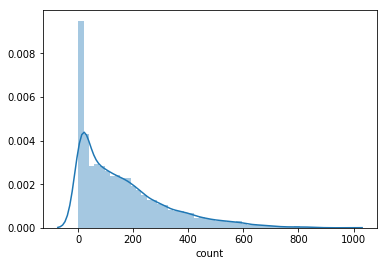

In [10]:
#checking skewness of distibution count

sn.distplot(train['count'])

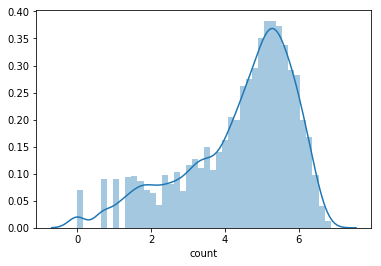

In [11]:
#it is found left skewed so we transform and check its skewness
#taking log because of skewness we have found

sn.distplot(np.log(train['count']))

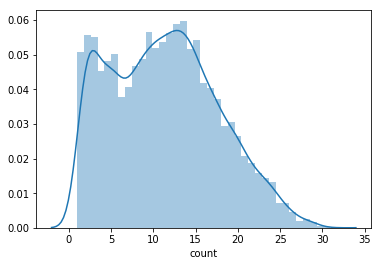

In [12]:
#looks less skewed but we will try to find better option

sn.distplot(np.sqrt(train['count']))

In [13]:
#so we can see it was found best on log graph

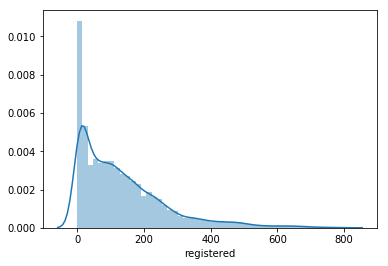

In [14]:
# checking registered users data

sn.distplot(train['registered'])

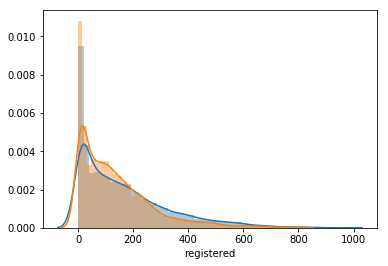

In [15]:
# checking registered users data with count

sn.distplot(train['count'])
sn.distplot(train['registered'])

In [16]:
#so here we can see according to KDE the number of registered vechiles is always less than the count

In [17]:
#checking corelation visually
corr = train.corr()
corr.style.background_gradient(cmap='gist_earth_r').set_precision(2)



,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1,-0.011,0.014,-0.013,0.39,0.4,0.18,-0.14,0.1,0.086,0.1
holiday,-0.011,1,-0.25,-0.018,-0.025,-0.033,-0.03,0.022,0.029,-0.046,-0.029
workingday,0.014,-0.25,1,0.053,0.061,0.065,0.028,0.002,-0.31,0.13,0.019
weather,-0.013,-0.018,0.053,1,-0.094,-0.095,0.43,0.011,-0.16,-0.14,-0.16
temp,0.39,-0.025,0.061,-0.094,1,0.99,-0.048,-0.0087,0.46,0.34,0.42
atemp,0.4,-0.033,0.065,-0.095,0.99,1,-0.032,-0.05,0.45,0.34,0.41
humidity,0.18,-0.03,0.028,0.43,-0.048,-0.032,1,-0.3,-0.32,-0.28,-0.32
windspeed,-0.14,0.022,0.002,0.011,-0.0087,-0.05,-0.3,1,0.08,0.1,0.11
casual,0.1,0.029,-0.31,-0.16,0.46,0.45,-0.32,0.08,1,0.51,0.71
registered,0.086,-0.046,0.13,-0.14,0.34,0.34,-0.28,0.1,0.51,1,0.97


In [18]:
#('Colormap warm is not recognized. Possible values are: 
#Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r,
#GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, 
#Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, 
#Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, 
#Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, 
#YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, 
#bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, 
# flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, 
# gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, 
# hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, 
# nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, 
# seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, 
# terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, 
# winter_r', 'occurred at index season')

In [19]:
# extracting date, hour and month from the datetime
train["date"] = train.datetime.apply(lambda x : x.split()[0])
train["hour"] = train.datetime.apply(lambda x : x.split()[1].split(":")[0])
train["month"] = train.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [20]:
test["date"] = test.datetime.apply(lambda x : x.split()[0])
test["hour"] = test.datetime.apply(lambda x : x.split()[1].split(":")[0])
test["month"] = test.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [21]:
training = train[train['datetime']<='2012-03-30 0:00:00']
validation = train[train['datetime']>'2012-03-30 0:00:00']

In [22]:
#droping atemp as it is highly correlated with temp
#droping datetime and date as we have already extracted features from these vars. 

train = train.drop(['datetime','date', 'atemp'],axis=1)
test = test.drop(['datetime','date', 'atemp'], axis=1)
training = training.drop(['datetime','date', 'atemp'],axis=1)
validation = validation.drop(['datetime','date', 'atemp'],axis=1)

In [23]:
#Building the MODEL

from sklearn.linear_model import LinearRegression

In [24]:
lModel = LinearRegression()

In [25]:
#seperating target variable from both traing and validation

X_train = training.drop('count', 1)
y_train = np.log(training['count'])

X_val = validation.drop('count', 1)
y_val = np.log(validation['count'])

In [26]:
# checking the shape of X_train, y_train, X_val and y_val
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((10774, 11), (10774,), (2206, 11), (2206,))

In [27]:
# fitting the model on X_train and y_train
lModel.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
# making prediction on validation set
prediction = lModel.predict(X_val)

In [29]:
# defining a function which will return the rmsle score
def rmsle(y, z):
    y = np.exp(y),   # taking the exponential as we took the log of target variable
    z = np.exp(z)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in z]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [30]:
rmsle(y_val,prediction)

0.8875379204281765

In [31]:
#as the value is very close to 0 so our model is working fine.
#predicting value of test

test_prediction = lModel.predict(test)


In [32]:
#building the decision tree

from sklearn.tree import DecisionTreeRegressor

In [33]:
dt_reg = DecisionTreeRegressor()

In [34]:
dt_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [35]:
predict_dt = dt_reg.predict(X_val)

In [36]:
# calculating rmsle of the predicted values
rmsle(y_val, predict_dt)

0.048694646731221335

In [37]:
#as the value is very very close to zero so our this predition is used on our test

test_prediction = dt_reg.predict(test)

In [38]:
#since the value is in log so we have to convert it back into normal form by making it exponential

final_prediction = np.exp(test_prediction)


In [39]:
#saving the final prediction now

submission = pd.DataFrame()

# creating a count column and saving the predictions in it
submission['count'] = final_prediction

In [40]:
submission.to_csv('submission.csv', header=True, index=False)